**PREPARE**

Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import datetime as dt

Importing dataset

In [4]:
daily_activity = pd.read_csv("dailyActivity_merged.csv")

**PROCESS**

Data cleaning and manipulation

In [5]:
#Preview the top 10 contents to check the data
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886
5,1503960366,3/30/2016,10970,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820
6,1503960366,3/31/2016,12256,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889
7,1503960366,4/1/2016,12262,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868
8,1503960366,4/2/2016,11248,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843
9,1503960366,4/3/2016,10016,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850


In [6]:
#Finding how many missing data points per column
missing_values_count = daily_activity.isnull().sum()

#look at the # of missing points in all columns
missing_values_count[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Finding the basic information of daily_activity:
1. How many rows and columns are there
2. Name of the columns
3. Type of columns

In [7]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

Counting the unique ID and to confirm whether data set has 30 IDs

In [8]:
unique_id = len(pd.unique(daily_activity["Id"]))
  
print("# of unique Id: " + str(unique_id))

# of unique Id: 35


There are 33 unique IDs, instead of 30 unique IDs as expected from 30 fitness tracker users

In [9]:
#Convert "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

#Print information to confirm
daily_activity.info()

#Print the first 5 rows to confirm
daily_activity["ActivityDate"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        457 non-null    int64         
 1   ActivityDate              457 non-null    datetime64[ns]
 2   TotalSteps                457 non-null    int64         
 3   TotalDistance             457 non-null    float64       
 4   TrackerDistance           457 non-null    float64       
 5   LoggedActivitiesDistance  457 non-null    float64       
 6   VeryActiveDistance        457 non-null    float64       
 7   ModeratelyActiveDistance  457 non-null    float64       
 8   LightActiveDistance       457 non-null    float64       
 9   SedentaryActiveDistance   457 non-null    float64       
 10  VeryActiveMinutes         457 non-null    int64         
 11  FairlyActiveMinutes       457 non-null    int64         
 12  LightlyActiveMinutes  

0   2016-03-25
1   2016-03-26
2   2016-03-27
3   2016-03-28
4   2016-03-29
Name: ActivityDate, dtype: datetime64[ns]

Re-arrange columns name

In [10]:
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']

daily_activity = daily_activity.reindex(columns=new_cols)

daily_activity.head(5)

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-03-25,NaN,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,NaN,NaN,1819
1,1503960366,2016-03-26,NaN,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,NaN,NaN,2154
2,1503960366,2016-03-27,NaN,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,NaN,NaN,1944
3,1503960366,2016-03-28,NaN,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,NaN,NaN,1932
4,1503960366,2016-03-29,NaN,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,NaN,NaN,1886


In [11]:
# create new column "day_of_the_week" to represent day of the week 
daily_activity["DayOfTheWeek"] = daily_activity["ActivityDate"].dt.day_name()

# print 1st 5 rows to confirm
daily_activity["DayOfTheWeek"].head(5)

0      Friday
1    Saturday
2      Sunday
3      Monday
4     Tuesday
Name: DayOfTheWeek, dtype: object

Rearranging and renaming columns from XxxYyy to xxx_yyy

In [13]:
daily_activity.rename(columns = {"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

print(daily_activity.columns.values)
daily_activity.head(5)

['id' 'date' 'day_of_the_week' 'total_steps' 'total_dist' 'track_dist'
 'logged_dist' 'very_active_dist' 'moderate_active_dist'
 'light_active_dist' 'sedentary_active_dist' 'very_active_mins'
 'fairly_active_mins' 'lightly_active_mins' 'sedentary_mins' 'total_mins'
 'total_hours' 'calories']


,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-03-25,Friday,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,NaN,NaN,1819
1,1503960366,2016-03-26,Saturday,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,NaN,NaN,2154
2,1503960366,2016-03-27,Sunday,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,NaN,NaN,1944
3,1503960366,2016-03-28,Monday,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,NaN,NaN,1932
4,1503960366,2016-03-29,Tuesday,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,NaN,NaN,1886


In [14]:
# create new column "total_mins" containing sum of total minutes.
daily_activity["total_mins"] = daily_activity["very_active_mins"] + daily_activity["fairly_active_mins"] + daily_activity["lightly_active_mins"] + daily_activity["sedentary_mins"]
daily_activity["total_mins"].head(5)

0    1054
1     968
2     934
3    1363
4    1062
Name: total_mins, dtype: int64

In [15]:
daily_activity["total_hours"] = round(daily_activity["total_mins"] / 60)

daily_activity["total_hours"].head(5)

0    18.0
1    16.0
2    16.0
3    23.0
4    18.0
Name: total_hours, dtype: float64

**ANALYZE**

Performing calculations of:
1. count = number of rows
2. mean = average
3. std = standard deviation
4. min and max
5. percentiles = 25%, 50%, 75%

In [16]:
#Pulling general statistics
daily_activity.describe()

,id,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,1195.045952,19.919037,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,306.457382,5.123904,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,41.000000,1.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,985.000000,16.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,1440.000000,24.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,1440.000000,24.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,1440.000000,24.000000,4562.000000


**VISUALIZATION**

How many users logged in app across the week visualization by using histogram

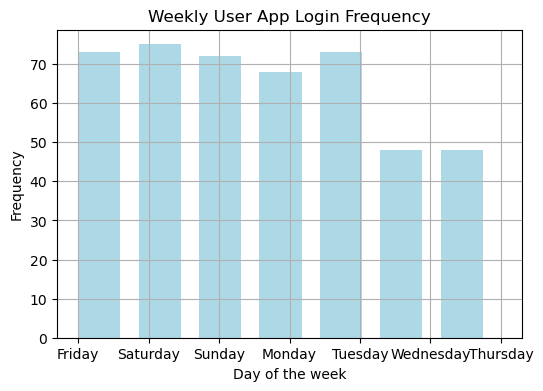

In [19]:
import matplotlib.pyplot as plt

#Plotting histogram
plt.style.use("default")
plt.figure(figsize=(6,4)) #Chart size
plt.hist(daily_activity.day_of_the_week, bins = 7, width = 0.6, color = "lightblue")

#Adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("Weekly User App Login Frequency")
plt.grid(True)
plt.show()

Calories burned for every step taken visualization by using Scatter Plot

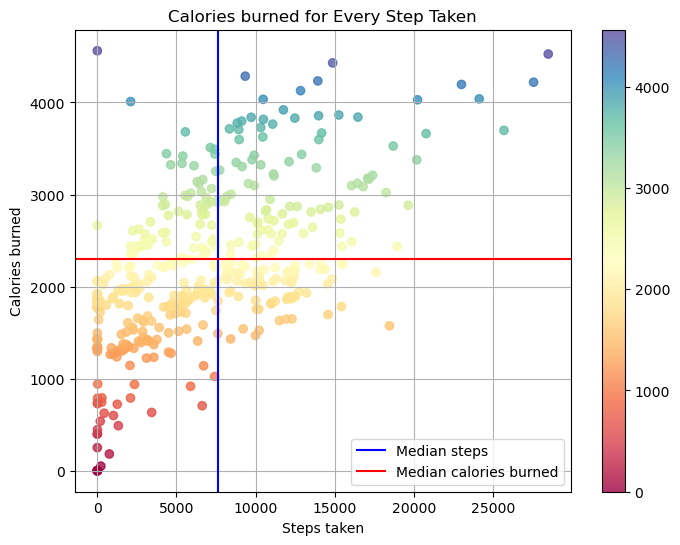

In [20]:
import matplotlib.pyplot as plt

#Plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) #Chart size
plt.scatter(daily_activity.total_steps, daily_activity.calories, alpha = 0.8, c = daily_activity.calories, cmap = "Spectral")

#Add annotations and visuals
median_calories = 2303
median_steps = 7637

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for Every Step Taken")
plt.grid(True)
plt.legend()
plt.show()

Calories burned for every hour logged visualization by using Scatter Plot

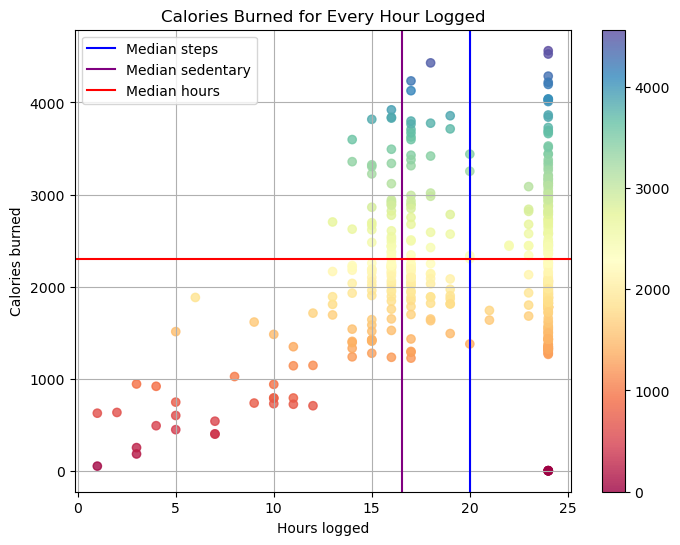

In [21]:
import matplotlib.pyplot as plt

#Plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(8,6)) # Specify size of the chart
plt.scatter(daily_activity.total_hours, daily_activity.calories, alpha = 0.8, c = daily_activity.calories, cmap = "Spectral")

#Adding annotations and visuals
median_calories = 2303
median_hours = 20
median_sedentary = 991 / 60

plt.colorbar(orientation = "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median steps")
plt.axvline(median_sedentary, color = "Purple", label = "Median sedentary")
plt.axhline(median_calories, color = "Red", label = "Median hours")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories Burned for Every Hour Logged")
plt.legend()
plt.grid(True)
plt.show()

Percentage of activity in minutes visualization by using pie chart

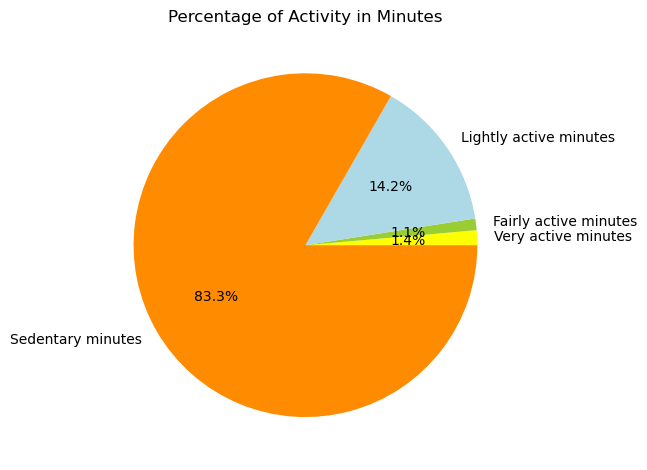

In [30]:
import matplotlib.pyplot as plt
import numpy as np

#Calculating total of individual minutes column
very_active_mins = daily_activity["very_active_mins"].sum()
fairly_active_mins = daily_activity["fairly_active_mins"].sum()
lightly_active_mins = daily_activity["lightly_active_mins"].sum()
sedentary_mins = daily_activity["sedentary_mins"].sum()

#Plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["yellow", "yellowgreen", "lightblue", "darkorange"]
explode = [0, 0, 0, 0]
plt.style.use("default")
plt.pie(slices, labels = labels, colors = colours, explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()